In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from constants import *

%matplotlib inline

In [2]:
all_tradings = pd.read_csv('./predictions/all_trading_check_point_all.csv')
all_tradings[60:80]

,Unnamed: 0,Date,Value,USD (PM),Gold Deal Open,BTC Value's Mean,Gold Value's Mean,BTC Prediction,Gold Prediction
60,60,2016-12-05,754.63,1162.200,True,742.351,1182.0600,763.914124,1173.498291
61,61,2016-12-06,756.62,1172.500,True,744.316,1178.0850,766.446838,1163.913452
62,62,2016-12-07,758.99,1177.650,True,746.052,1177.3150,759.024902,1158.961182
63,63,2016-12-08,769.72,1171.050,True,749.279,1175.8100,756.089417,1177.468628
64,64,2016-12-09,770.02,1163.600,True,752.717,1173.4000,759.012878,1177.648682
65,65,2016-12-12,777.00,1156.100,True,757.686,1170.3100,765.577942,1169.742432
66,66,2016-12-13,777.99,1158.550,True,762.214,1167.5100,769.710144,1166.630371
67,67,2016-12-14,774.89,1162.250,True,765.434,1165.9250,774.606323,1164.950073
68,68,2016-12-15,776.75,1126.950,True,768.904,1162.4350,773.422119,1164.361450
69,69,2016-12-16,775.88,1131.600,True,769.249,1158.2450,776.729492,1129.854736


In [3]:
all_tradings[LABEL_GOLD_INCREASE] = 0.0
all_tradings[LABEL_BTC_INCREASE] = 0.0
all_tradings[LABEL_GOLD_INCREASE_PERCENT] = 0.0
all_tradings[LABEL_BTC_INCREASE_PERCENT] = 0.0
all_tradings[LABEL_ACCURACY_GOLD] = 0.0
all_tradings[LABEL_ACCURACY_BTC] = 0.0

for row in range(6, all_tradings.shape[0]):
    all_tradings[LABEL_GOLD_INCREASE].iat[row] = (
        all_tradings[LABEL_PREDICTION_GOLD].iat[row] - all_tradings[LABEL_GOLD_VALUE].iat[row-1])
    all_tradings[LABEL_BTC_INCREASE].iat[row] = (
        all_tradings[LABEL_PREDICTION_BTC].iat[row] - all_tradings[LABEL_BITCOIN_VALUE].iat[row-1])

    all_tradings[LABEL_GOLD_INCREASE_PERCENT].iat[row] = all_tradings[LABEL_GOLD_INCREASE].iat[row] / \
        (all_tradings[LABEL_GOLD_INCREASE][:row].max() -
         all_tradings[LABEL_GOLD_INCREASE][:row].min())
    all_tradings[LABEL_BTC_INCREASE_PERCENT].iat[row] = all_tradings[LABEL_BTC_INCREASE].iat[row] / \
        (all_tradings[LABEL_BTC_INCREASE][:row].max() -
         all_tradings[LABEL_BTC_INCREASE][:row].min())

all_tradings[LABEL_ACCURACY_BTC] = 1 - ((all_tradings[LABEL_PREDICTION_BTC] -
                                        all_tradings[LABEL_BITCOIN_VALUE]) / all_tradings[LABEL_BITCOIN_VALUE]).abs()
all_tradings[LABEL_ACCURACY_GOLD] = 1 - ((all_tradings[LABEL_PREDICTION_GOLD] -
                                         all_tradings[LABEL_GOLD_VALUE]) / all_tradings[LABEL_GOLD_VALUE]).abs()

all_tradings[60:80]


C:\Users\SalHe\AppData\Local\Temp\ipykernel_75832\2047603119.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  all_tradings[LABEL_GOLD_INCREASE_PERCENT].iat[row] = all_tradings[LABEL_GOLD_INCREASE].iat[row] / \
C:\Users\SalHe\AppData\Local\Temp\ipykernel_75832\2047603119.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  all_tradings[LABEL_BTC_INCREASE_PERCENT].iat[row] = all_tradings[LABEL_BTC_INCREASE].iat[row] / \


,Unnamed: 0,Date,Value,USD (PM),Gold Deal Open,BTC Value's Mean,Gold Value's Mean,BTC Prediction,Gold Prediction,Gold Increasement,BTC Increasement,Gold Increasement Percent,BTC Increasement Percent,Accuracy Gold,Accuracy BTC
60,60,2016-12-05,754.63,1162.200,True,742.351,1182.0600,763.914124,1173.498291,-0.001709,-8.515876,-0.000031,-0.102386,0.990279,0.987697
61,61,2016-12-06,756.62,1172.500,True,744.316,1178.0850,766.446838,1163.913452,1.713452,11.816838,0.031377,0.142073,0.992677,0.987012
62,62,2016-12-07,758.99,1177.650,True,746.052,1177.3150,759.024902,1158.961182,-13.538818,2.404902,-0.247927,0.028914,0.984130,0.999954
63,63,2016-12-08,769.72,1171.050,True,749.279,1175.8100,756.089417,1177.468628,-0.181372,-2.900583,-0.003321,-0.034874,0.994519,0.982292
64,64,2016-12-09,770.02,1163.600,True,752.717,1173.4000,759.012878,1177.648682,6.598682,-10.707122,0.120837,-0.128731,0.987927,0.985705
65,65,2016-12-12,777.00,1156.100,True,757.686,1170.3100,765.577942,1169.742432,6.142432,-4.442058,0.112482,-0.053407,0.988200,0.985300
66,66,2016-12-13,777.99,1158.550,True,762.214,1167.5100,769.710144,1166.630371,10.530371,-7.289856,0.192836,-0.087645,0.993025,0.989357
67,67,2016-12-14,774.89,1162.250,True,765.434,1165.9250,774.606323,1164.950073,6.400073,-3.383677,0.117200,-0.040682,0.997677,0.999634
68,68,2016-12-15,776.75,1126.950,True,768.904,1162.4350,773.422119,1164.361450,2.111450,-1.467881,0.038666,-0.017648,0.966803,0.995716
69,69,2016-12-16,775.88,1131.600,True,769.249,1158.2450,776.729492,1129.854736,2.904736,-0.020508,0.053192,-0.000247,0.998458,0.998905


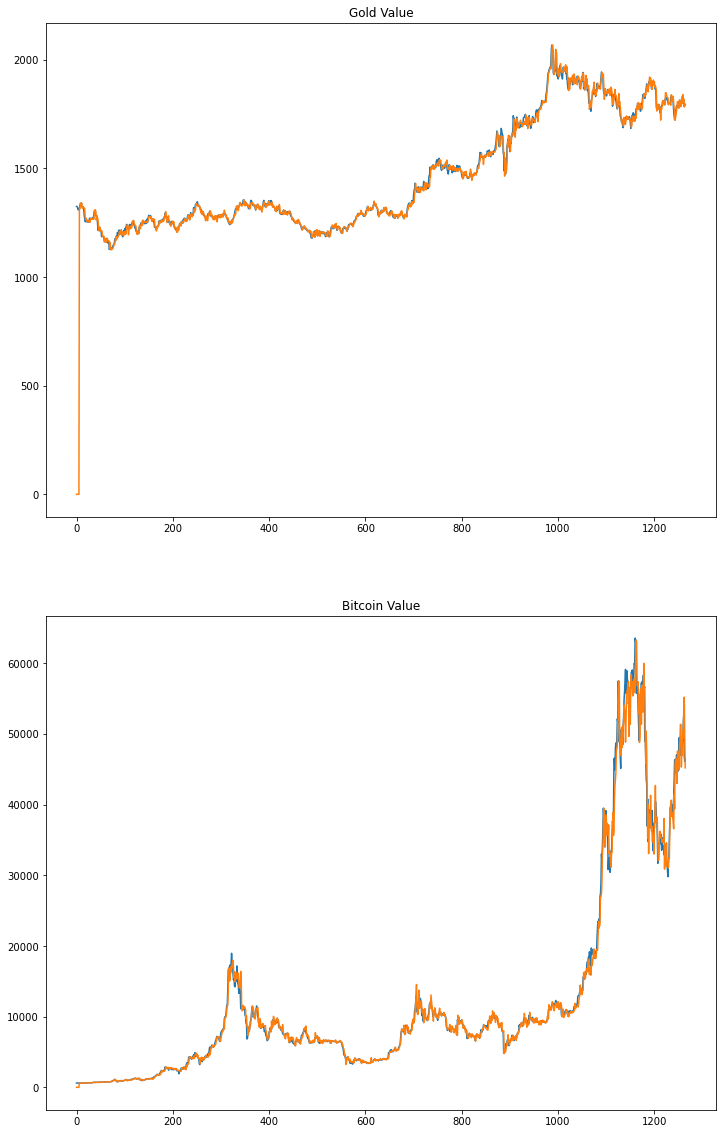

In [4]:
plt.figure(figsize=(12, 20))

plt.subplot(2,1,1)
plt.title('Gold Value')
plt.plot(all_tradings[LABEL_GOLD_VALUE], label=LABEL_GOLD_VALUE)
plt.plot(all_tradings[LABEL_PREDICTION_GOLD], label=LABEL_PREDICTION_GOLD)

plt.subplot(2,1,2)
plt.title('Bitcoin Value')
plt.plot(all_tradings[LABEL_BITCOIN_VALUE], label=LABEL_BITCOIN_VALUE)
plt.plot(all_tradings[LABEL_PREDICTION_BTC], label=LABEL_PREDICTION_BTC)

plt.show()

In [5]:
mean = all_tradings[LABEL_GOLD_VALUE].rolling(window=10).mean()
all_tradings[LABEL_BIAS_GOLD] =( all_tradings[LABEL_PREDICTION_GOLD] -mean)/mean
mean = all_tradings[LABEL_BITCOIN_VALUE].rolling(window=10).mean()
all_tradings[LABEL_BIAS_BTC] =( all_tradings[LABEL_PREDICTION_BTC] -mean)/mean
all_tradings[LABEL_ACCURACY_GOLD_IN_PAST] = all_tradings[LABEL_ACCURACY_GOLD].rolling(window=30).mean()
all_tradings[LABEL_ACCURACY_BTC_IN_PAST] = all_tradings[LABEL_ACCURACY_BTC].rolling(window=30).mean()

all_tradings.fillna(0.0, inplace=True)

all_tradings

,Unnamed: 0,Date,Value,USD (PM),Gold Deal Open,BTC Value's Mean,Gold Value's Mean,BTC Prediction,Gold Prediction,Gold Increasement,BTC Increasement,Gold Increasement Percent,BTC Increasement Percent,Accuracy Gold,Accuracy BTC,Bias Gold,Bias BTC,Accuracy Gold In Past,Accuracy BTC In Past
0,0,2016-09-12,609.67,1324.60,True,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2016-09-13,610.92,1323.65,True,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2016-09-14,608.82,1321.75,True,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,2016-09-15,610.38,1310.80,True,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,2016-09-16,609.11,1308.35,True,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1260,2021-09-06,51769.06,1821.60,True,48673.012,1806.875,49403.023438,1808.892456,-14.807544,74.013437,-0.108605,0.004859,0.993024,0.954296,0.001117,0.014998,0.991298,0.956358
1261,1261,2021-09-07,52677.40,1802.15,True,49007.184,1806.890,53898.691406,1819.034302,-2.565698,2129.631406,-0.018818,0.139816,0.990631,0.976816,0.006721,0.099812,0.991039,0.958388
1262,1262,2021-09-08,46809.17,1786.00,True,48735.751,1804.645,55196.207031,1781.886963,-20.263037,2518.807031,-0.148619,0.165366,0.997697,0.820825,-0.012611,0.132561,0.990990,0.953709
1263,1263,2021-09-09,46078.38,1788.25,True,48569.131,1804.600,49512.269531,1794.879028,8.879028,2703.099531,0.065123,0.177465,0.996293,0.925477,-0.005387,0.019418,0.990878,0.951396


In [15]:
def calc_kelly_f(label_bias, label_f, label_accuracy_in_past):
    b = -all_tradings[label_bias] / \
        (all_tradings[label_bias].rolling(window=30).max() * 2)
    p_win = all_tradings[label_accuracy_in_past] * \
        (all_tradings[label_bias] > 0).apply(int)
    p_loss = 1 - p_win
    all_tradings[label_f] = (p_win*b - p_loss)/b


calc_kelly_f(LABEL_BIAS_GOLD, LABEL_KELLY_BUY_IN_GOLD,
             LABEL_ACCURACY_GOLD_IN_PAST)
calc_kelly_f(LABEL_BIAS_BTC, LABEL_KELLY_BUY_IN_BTC,
             LABEL_ACCURACY_BTC_IN_PAST)

# all_tradings.to_csv('temp.csv')
